### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

去重前数据量: 20358, 去重后数据量: 19779
去掉 'gravatar_id' 列后的缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at      

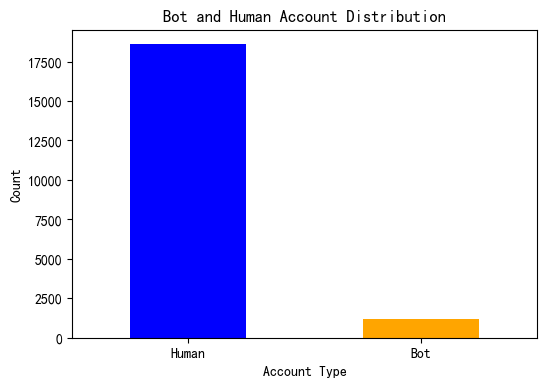

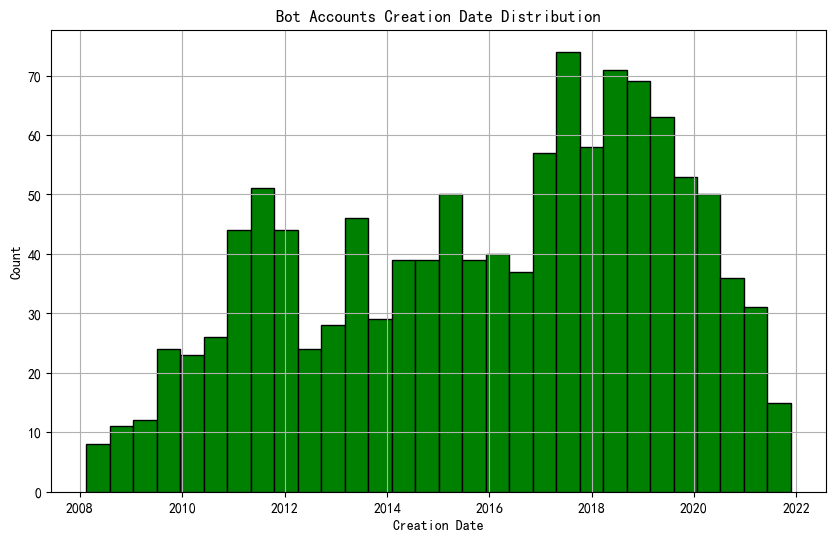

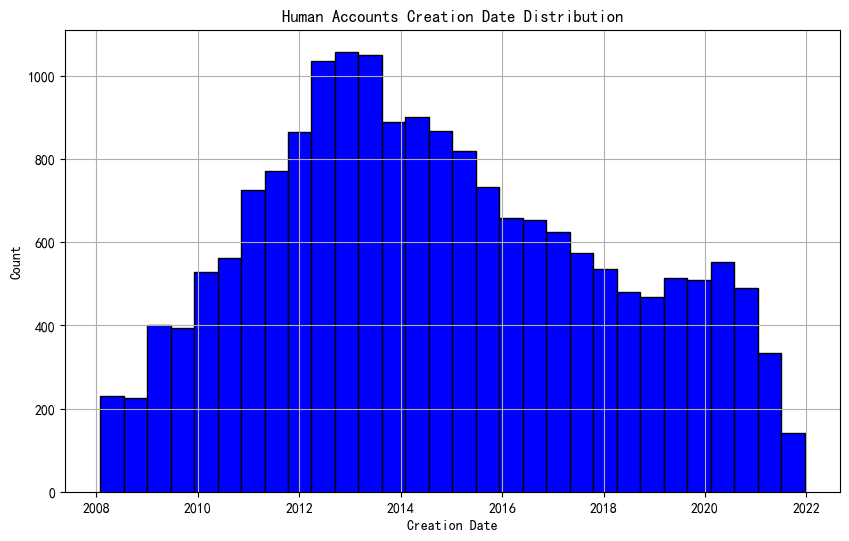

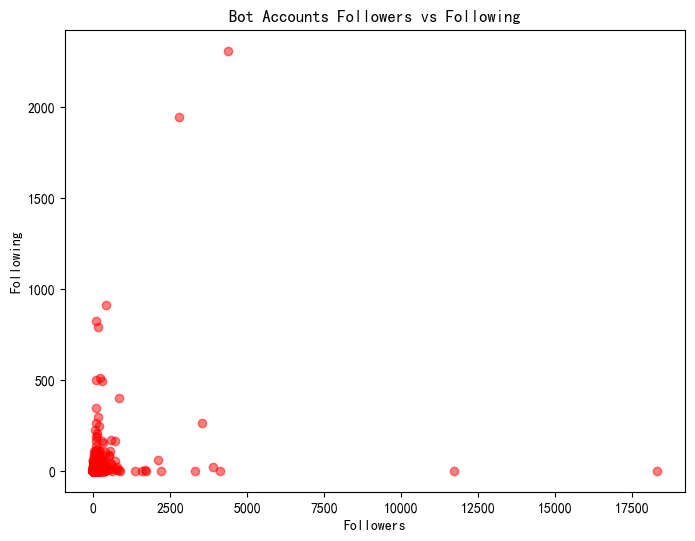

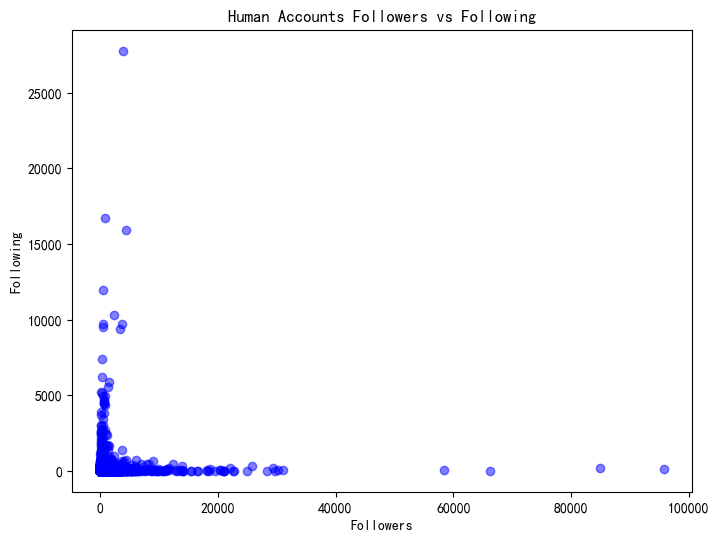

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
raw_data = pd.read_csv('github_bot_raw_data.csv') 
# 设置字体为 SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置显示中文
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]


# 删除重复数据
before_deduplication = len(raw_data)
data = raw_data.drop_duplicates()

# 输出去重前后的数据量
after_deduplication = len(data)
print(f"去重前数据量: {before_deduplication}, 去重后数据量: {after_deduplication}")
# 去掉 gravatar_id 列
data = data.drop(columns=['gravatar_id'])

# 查看各列的缺失值情况
missing_values_before = data.isnull().sum()
print("去掉 'gravatar_id' 列后的缺失值情况：")
print(missing_values_before)
# 将可转化为布尔变量的列转化为布尔值
boolean_columns = ['hireable', 'site_admin']  # 假设这些列可以转换为布尔值
for col in boolean_columns:
    data[col] = data[col].astype('bool')

# 填充文本数据的缺失值（例如公司、位置等）
text_columns = ['company', 'location', 'blog', 'email', 'bio', 'twitter_username']
for col in text_columns:
    data[col] = data[col].fillna('')

# 再次查看各列的缺失值情况
missing_values_after = data.isnull().sum()
print("处理缺失值后的情况：")
print(missing_values_after)
# 转换 created_at 和 updated_at 为时间戳
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])


# 可视化 bot 和 human 类型的情况
label_counts = data['label'].value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Bot and Human Account Distribution')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
# 只取 Bot 类型的账号
bot_data = data[data['label'] == 'Bot']

# 可视化 Bot 类型账号的创建时间分布
plt.figure(figsize=(10, 6))
bot_data['created_at'].hist(bins=30, color='green', edgecolor='black')
plt.title('Bot Accounts Creation Date Distribution')
plt.xlabel('Creation Date')
plt.ylabel('Count')
plt.show()
# 只取 Human 类型的账号
human_data = data[data['label'] == 'Human']

# 可视化 Human 类型账号的创建时间分布
plt.figure(figsize=(10, 6))
human_data['created_at'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Human Accounts Creation Date Distribution')
plt.xlabel('Creation Date')
plt.ylabel('Count')
plt.show()
# 可视化 Bot 类型账号的 followers 和 following
plt.figure(figsize=(8, 6))
plt.scatter(bot_data['followers'], bot_data['following'], alpha=0.5, color='red')
plt.title('Bot Accounts Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()
# 可视化 Human 类型账号的 followers 和 following
plt.figure(figsize=(8, 6))
plt.scatter(human_data['followers'], human_data['following'], alpha=0.5, color='blue')
plt.title('Human Accounts Followers vs Following')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()
